<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Celeste_Hands_on_Activity_1_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   times_pregnant          768 non-null    int64  
 1   glucose_tolerance_test  768 non-null    int64  
 2   blood_pressure          768 non-null    int64  
 3   skin_thickness          768 non-null    int64  
 4   insulin                 768 non-null    int64  
 5   bmi                     768 non-null    float64
 6   pedigree_function       768 non-null    float64
 7   age                     768 non-null    int64  
 8   has_diabetes            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
582,12,121,78,17,0,26.5,0.259,62,0
435,0,141,0,0,0,42.4,0.205,29,1
635,13,104,72,0,0,31.2,0.465,38,1
674,8,91,82,0,0,35.6,0.587,68,0
129,0,105,84,0,0,27.9,0.741,62,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 12)                108       
                                                                 
 dense_42 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 0.7169 - accuracy: 0.4931 - val_loss: 0.7007 - val_accuracy: 0.5312
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.5382 - val_loss: 0.6881 - val_accuracy: 0.5677
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5677 - val_loss: 0.6769 - val_accuracy: 0.5833
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.6215 - val_loss: 0.6669 - val_accuracy: 0.6198
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6424 - val_loss: 0.6578 - val_accuracy: 0.6562
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6580 - val_loss: 0.6495 - val_accuracy: 0.6667
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6649 - val_loss: 0.6418 - val_accuracy: 0.6823
Epoch 8/200


In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

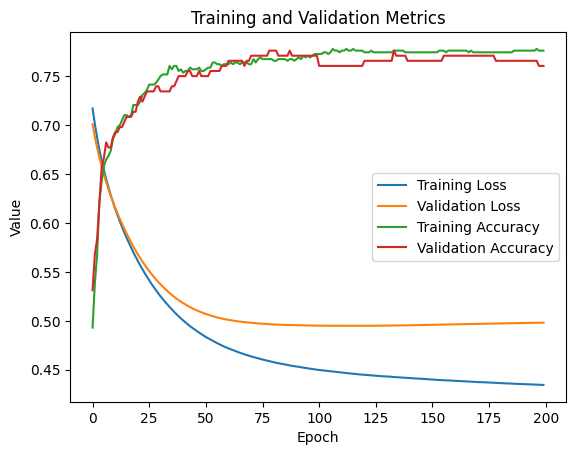

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history
loss = run_hist_1.history['loss']
accuracy = run_hist_1.history['accuracy']
val_loss = run_hist_1.history['val_loss']
val_accuracy = run_hist_1.history['val_accuracy']

# Set up the figure and the axes
fig, ax = plt.subplots()

# Plot the loss and validation loss
ax.plot(range(len(loss)), loss, label='Training Loss')
ax.plot(range(len(val_loss)), val_loss, label='Validation Loss')

# Plot the accuracy and validation accuracy
ax.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
ax.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')

# Set the title and labels
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.56907296],
       [0.74526525],
       [0.30074242],
       [0.3069693 ],
       [0.21200383],
       [0.51434666],
       [0.02253771],
       [0.19096902],
       [0.9226938 ],
       [0.12155528]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.822


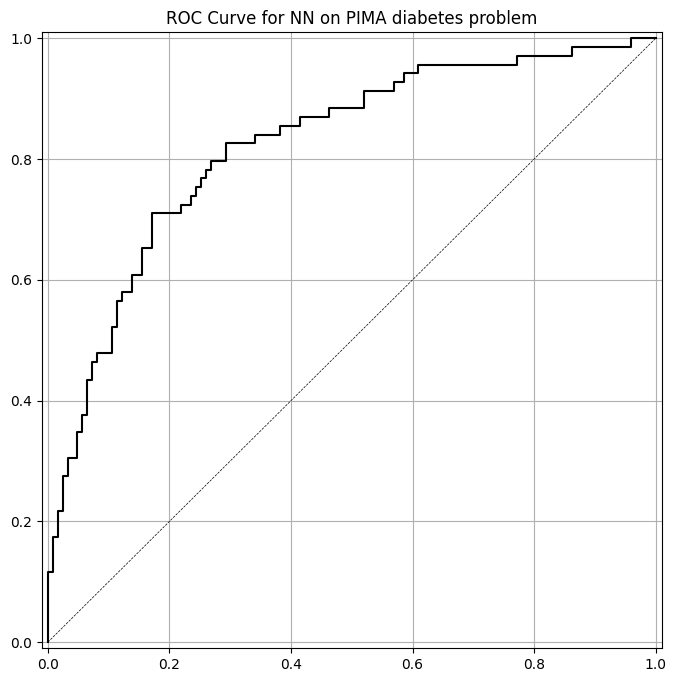

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

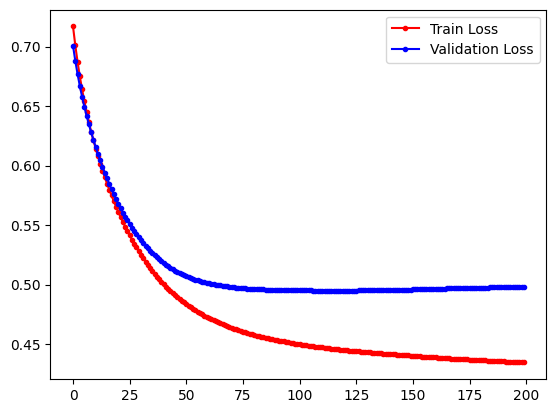

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

- Based on the graph, the training loss and the validation loss drastically declined. The result of the train and validation loss suggests that the model is training effectively during the 200 epochs.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
dataset = pd.read_csv('/content/pima-indians-diabetes.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1111)

In [ ]:
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

## 2 Hidden Layers with 6 nodes each, 0.003 Learning Rate, and 1500 epochs


In [ ]:
model_1 = Sequential()
model_1.add(Dense(6, input_shape=(8,), activation="relu"))
model_1.add(Dense(6, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

model_1.compile(optimizer=SGD(learning_rate=0.003), loss='binary_crossentropy', metrics=['accuracy'])
run_hist_1 = model_1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 [==============================] - 1s 15ms/step - loss: 0.7619 - accuracy: 0.4730 - val_loss: 0.7372 - val_accuracy: 0.5000
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7532 - accuracy: 0.4765 - val_loss: 0.7287 - val_accuracy: 0.5104
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.4800 - val_loss: 0.7211 - val_accuracy: 0.5208
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7380 - accuracy: 0.4887 - val_loss: 0.7140 - val_accuracy: 0.5260
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7312 - accuracy: 0.4991 - val_loss: 0.7074 - val_accuracy: 0.5260
Epoch 6/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.7249 - accuracy: 0.5061 - val_loss: 0.7015 - val_accuracy: 0.5417
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7191 - accuracy: 0.5096 - val_loss: 0.6961 - val_accuracy: 0.5573
Epoch

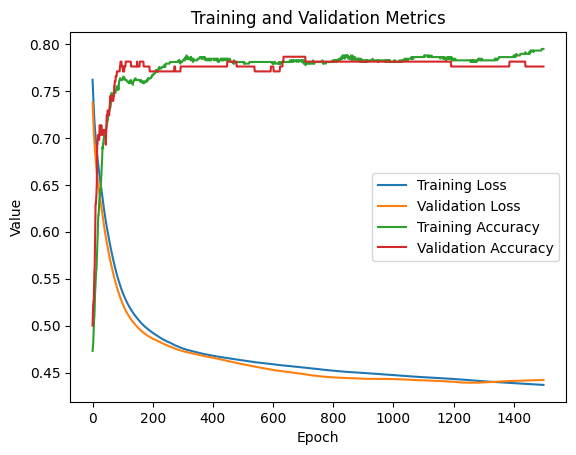

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history
loss = run_hist_1.history['loss']
accuracy = run_hist_1.history['accuracy']
val_loss = run_hist_1.history['val_loss']
val_accuracy = run_hist_1.history['val_accuracy']

# Set up the figure and the axes
fig, ax = plt.subplots()

# Plot the loss and validation loss
ax.plot(range(len(loss)), loss, label='Training Loss')
ax.plot(range(len(val_loss)), val_loss, label='Validation Loss')

# Plot the accuracy and validation accuracy
ax.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
ax.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')

# Set the title and labels
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

###Analysis on Training and Validation Metrics:

Based on the graph, as the number of training epochs increases, the training loss decreases, showing that the model is learning from the training data. The Training loss and Validation loss can be seen pretty close to each other, which indicates that the model is not overfitted and is effectively training the data.

Overall, the graph suggests that the model performs well in classifying the data. The model does not appear to be overfitting to the training data, indicating that it can generalize well to new data.



6/6 [==============================] - 0s 2ms/step


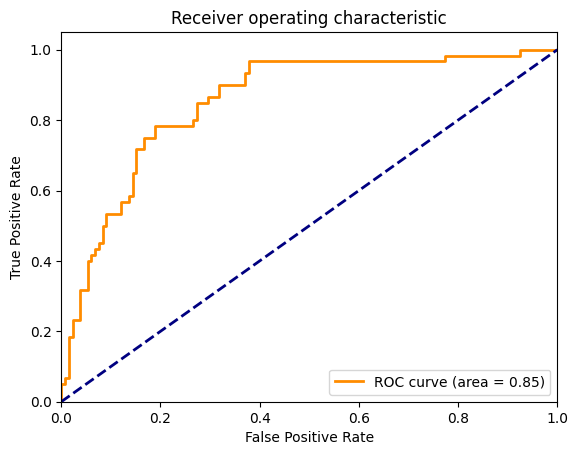

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate probabilities for the test set
y_pred_prob = model_1.predict(X_test_norm)

# Calculate the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###Observation on ROC:

The ROC curve resulted in 0.85. This value indicates that the model performs effectively in identifying true positives and minimizing false positives.

## 4 Hidden layers with 16 nodes each, 'relu' activation, 0.01 Learning Rate, and 1000 epochs

In [ ]:
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_shape=(8,)))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
hist2 = model_2.fit(x_train_norm, y_train, epochs=1000, validation_data=(x_test_norm, y_test))


Epoch 1/1000
18/18 [==============================] - 1s 24ms/step - loss: 0.6477 - accuracy: 0.6557 - val_loss: 0.6396 - val_accuracy: 0.6354
Epoch 2/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6539 - val_loss: 0.6372 - val_accuracy: 0.6510
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6591 - val_loss: 0.6348 - val_accuracy: 0.6510
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6591 - val_loss: 0.6325 - val_accuracy: 0.6667
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6574 - val_loss: 0.6303 - val_accuracy: 0.6510
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6643 - val_loss: 0.6281 - val_accuracy: 0.6510
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6643 - val_loss: 0.6260 - val_accuracy: 0.6510
Epoc

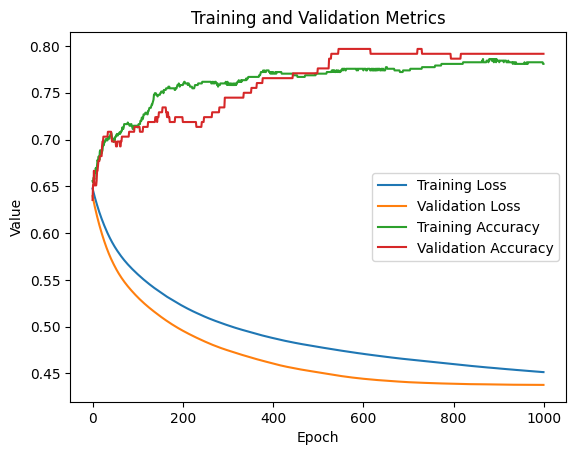

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history
loss = hist2.history['loss']
accuracy = hist2.history['accuracy']
val_loss = hist2.history['val_loss']
val_accuracy = hist2.history['val_accuracy']

# Set up the figure and the axes
fig, ax = plt.subplots()

# Plot the loss and validation loss
ax.plot(range(len(loss)), loss, label='Training Loss')
ax.plot(range(len(val_loss)), val_loss, label='Validation Loss')

# Plot the accuracy and validation accuracy
ax.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
ax.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')

# Set the title and labels
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

###Analysis on Training and Validation Metrics:

The training and validation metrics are calculated as the average of the accuracy, precision, and F1-score for the positive class. A value of 0.80 suggests that the model is performing well, as it is close to the ideal value of 1.0. The training and validation accuracy values are quite close, indicating that the model is not overfitting to the training data.

Overall, the graph suggests the binary classification model is effectively classifying the data. This is based from the high training and validation metrics, low training and validation loss, and high training and validation accuracy.



6/6 [==============================] - 0s 2ms/step


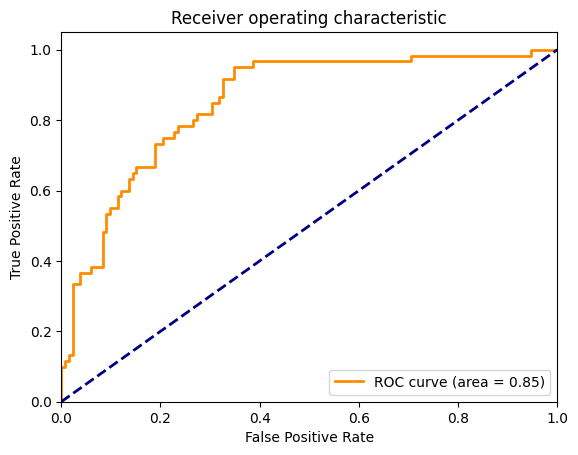

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate probabilities for the test set
y_pred_prob = model_2.predict(X_test_norm)

# Calculate the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###Observation on ROC:

The ROC curve has an area under the curve (AUC) of 0.84, which indicates good performance. The TPR and FPR values in the context suggest that the model performs well in identifying true positive observations, even when the classification threshold is set low. For example, when the FPR is 0.2, the TPR is between 0.6 and 0.8, indicating that approximately 80% of the actual positive observations are correctly identified.

Overall, the ROC, just like the first model, suggests that the classification model performs well in identifying true positive observations while minimizing false positives.

## 3 Hidden Layers with different number of nodes, 0.001 Learning Rate, and 2000 epochs

In [ ]:
model_3 = Sequential()
model_3.add(Dense(8, input_shape=(8,), activation="relu"))
model_3.add(Dense(10, activation="relu"))
model_3.add(Dense(12, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=2000)

Epoch 1/2000
18/18 [==============================] - 1s 21ms/step - loss: 0.7035 - accuracy: 0.4504 - val_loss: 0.7008 - val_accuracy: 0.5104
Epoch 2/2000
18/18 [==============================] - 0s 6ms/step - loss: 0.7025 - accuracy: 0.4591 - val_loss: 0.6997 - val_accuracy: 0.5208
Epoch 3/2000
18/18 [==============================] - 0s 6ms/step - loss: 0.7016 - accuracy: 0.4730 - val_loss: 0.6987 - val_accuracy: 0.5365
Epoch 4/2000
18/18 [==============================] - 0s 7ms/step - loss: 0.7006 - accuracy: 0.4783 - val_loss: 0.6977 - val_accuracy: 0.5469
Epoch 5/2000
18/18 [==============================] - 0s 6ms/step - loss: 0.6997 - accuracy: 0.4870 - val_loss: 0.6967 - val_accuracy: 0.5417
Epoch 6/2000
18/18 [==============================] - 0s 7ms/step - loss: 0.6988 - accuracy: 0.4852 - val_loss: 0.6956 - val_accuracy: 0.5417
Epoch 7/2000
18/18 [==============================] - 0s 6ms/step - loss: 0.6979 - accuracy: 0.4974 - val_loss: 0.6946 - val_accuracy: 0.5625
Epoch

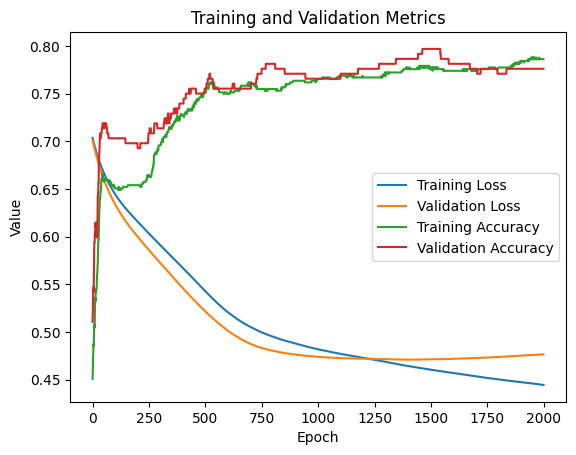

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history
loss = run_hist_3.history['loss']
accuracy = run_hist_3.history['accuracy']
val_loss = run_hist_3.history['val_loss']
val_accuracy = run_hist_3.history['val_accuracy']

# Set up the figure and the axes
fig, ax = plt.subplots()

# Plot the loss and validation loss
ax.plot(range(len(loss)), loss, label='Training Loss')
ax.plot(range(len(val_loss)), val_loss, label='Validation Loss')

# Plot the accuracy and validation accuracy
ax.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
ax.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')

# Set the title and labels
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


###Analysis on Training and Validation Metrics:

Based on the graph, the training loss starts high and decreases over time, and the training accuracy starts high and decreases slightly over time. This is not necessarily a bad thing, as long as the validation accuracy, which measures the proportion of validation data that the model classifies correctly, is also high. However, the validation accuracy starts high but decreases significantly over time, which further indicates that the model is overfitting to the training data.

In conclusion, it seems that the model is becoming less effective over time and is overfitting to the training data.

6/6 [==============================] - 0s 2ms/step


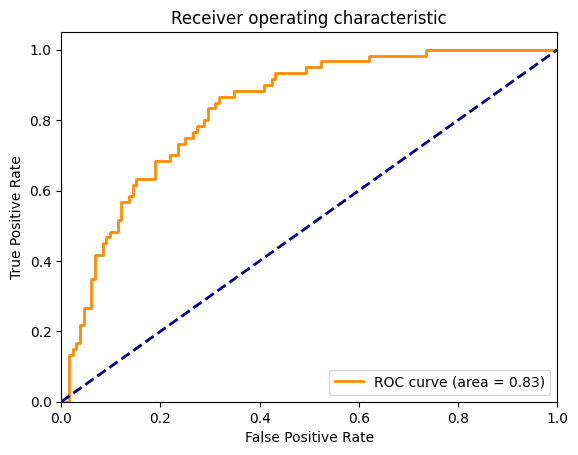

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate probabilities for the test set
y_pred_prob = model_3.predict(X_test_norm)

# Calculate the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###Observation on ROC:

This ROC curve illustrating a binary classifier system with an AUC of 0.83 which shows good performance.

#### Conclusion

#type your answer here

In this activity, I learned that the performance of a classification model depends and varies on the parameters that it has been given. Based on the different models I had tested, some dispalyed overfitting, while some provided high validation accuracy and training accurcy.

Overall, I learned in this activity that selecting parameters for a neural network model is necessary because the performance of the model itself depends on it
